In [49]:
'''Student Name: Jiajun Yang
  Student ID: 1010128862
  Instructor Name: Prof. Shion Guha
  Course Code: INF2178
  Course Name: Experimental Design for Data Science
  Faculty: Faculty of Information
'''

'Student Name: Jiajun Yang\n  Student ID: 1010128862\n  Instructor Name: Prof. Shion Guha\n  Course Code: INF2178\n  Course Name: Experimental Design for Data Science\n  Faculty: Faculty of Information\n'

In [50]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/2178/INF2178_A3_data.csv')
data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [53]:
# Calculate changes in scores from fall to spring for each subject
data['reading_score_change'] = data['springreadingscore'] - data['fallreadingscore']
data['math_score_change'] = data['springmathscore'] - data['fallmathscore']
data['general_knowledge_score_change'] = data['springgeneralknowledgescore'] - data['fallgeneralknowledgescore']

# Check the distribution of income groups
income_group_counts = data['incomegroup'].value_counts()

# Display income group distribution and score changes summary statistics
income_group_counts, data[['reading_score_change', 'math_score_change', 'general_knowledge_score_change']].describe()

(1    4729
 2    3726
 3    3478
 Name: incomegroup, dtype: int64,
        reading_score_change  math_score_change  general_knowledge_score_change
 count          11933.000000       11933.000000                    11933.000000
 mean              11.556963          10.671218                        5.161890
 std                8.085004           6.855263                        4.054906
 min              -44.760000         -22.160000                      -14.183000
 25%                6.470000           6.010000                        2.472000
 50%               10.400000           9.860000                        5.047000
 75%               15.150000          14.330000                        7.781000
 max               91.940000          75.350000                       27.785000)

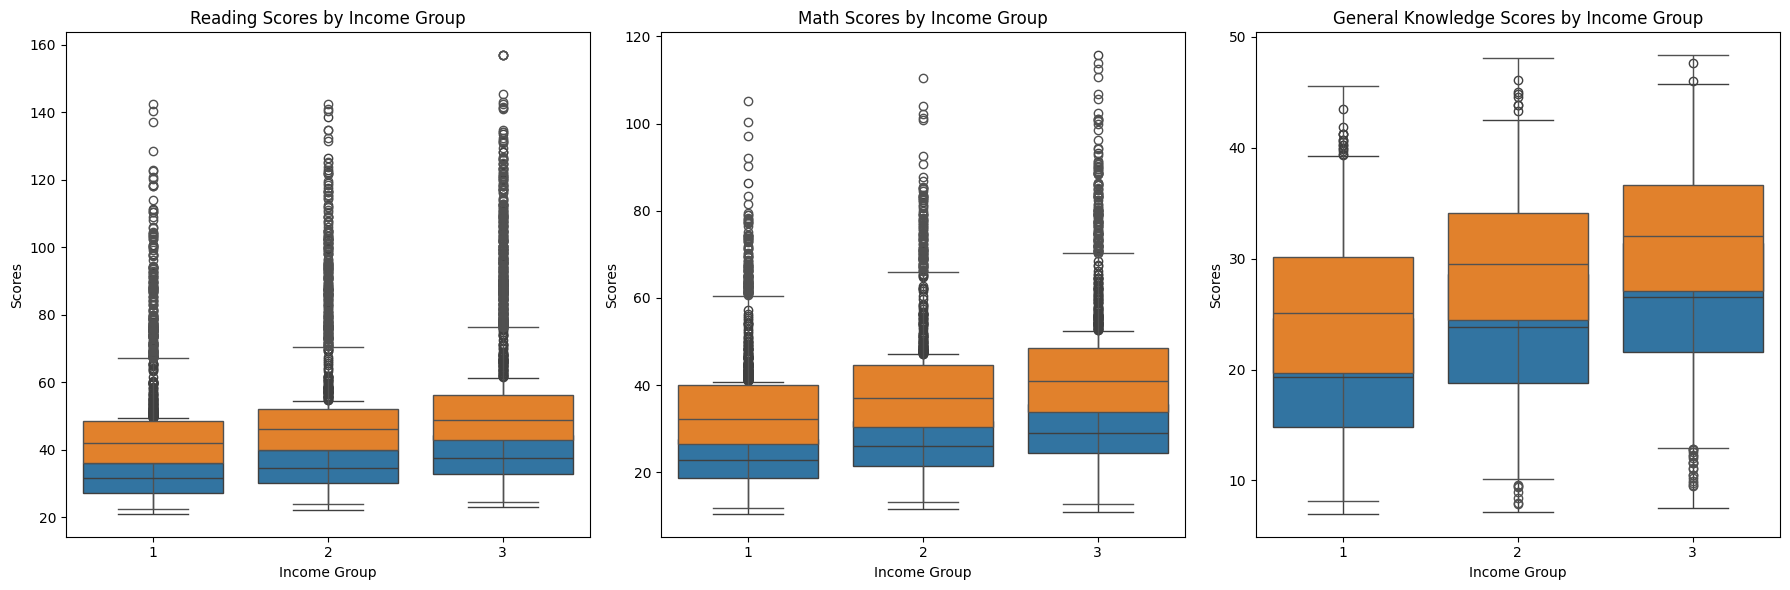

In [54]:
# Create a figure for the box plots
plt.figure(figsize=(18, 6))

# Box plot for reading scores
plt.subplot(1, 3, 1)
sns.boxplot(x='incomegroup', y='fallreadingscore', data=data)
sns.boxplot(x='incomegroup', y='springreadingscore', data=data)
plt.title('Reading Scores by Income Group')
plt.ylabel('Scores')
plt.xlabel('Income Group')

# Box plot for math scores
plt.subplot(1, 3, 2)
sns.boxplot(x='incomegroup', y='fallmathscore', data=data)
sns.boxplot(x='incomegroup', y='springmathscore', data=data)
plt.title('Math Scores by Income Group')
plt.ylabel('Scores')
plt.xlabel('Income Group')

# Box plot for general knowledge scores
plt.subplot(1, 3, 3)
sns.boxplot(x='incomegroup', y='fallgeneralknowledgescore', data=data)
sns.boxplot(x='incomegroup', y='springgeneralknowledgescore', data=data)
plt.title('General Knowledge Scores by Income Group')
plt.ylabel('Scores')
plt.xlabel('Income Group')

plt.tight_layout()
plt.show()

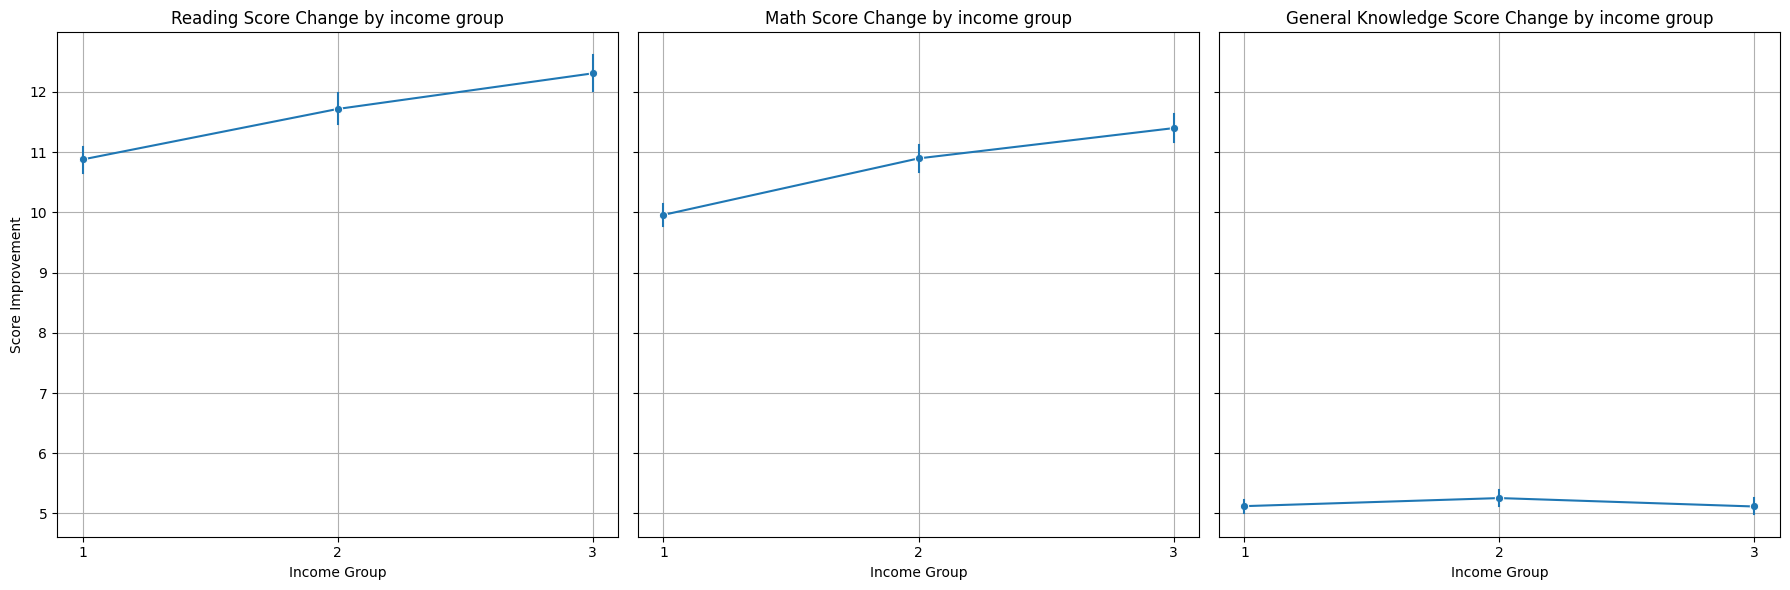

In [55]:
# Setting up the figure for multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Titles for each subplot
titles = ['Reading Score Change by income group', 'Math Score Change by income group', 'General Knowledge Score Change by income group']

# Score changes to plot
score_changes = ['reading_score_change', 'math_score_change', 'general_knowledge_score_change']

# Iterating over each subplot to create a line plot
for ax, title, score_change in zip(axes, titles, score_changes):
    sns.lineplot(ax=ax, data=data, x='incomegroup', y=score_change, marker='o', err_style="bars", errorbar=('ci', 95))
    ax.set_title(title)
    ax.set_xlabel('Income Group')
    ax.set_ylabel('Score Improvement')
    ax.set_xticks([1, 2, 3])  # Adjust according to your income groups
    ax.grid(True)

plt.tight_layout()
plt.show()

In [56]:
# Model for ANCOVA with reading score change as dependent variable
model_reading = ols('reading_score_change ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()

# Print model summary
print(model_reading.summary())

                             OLS Regression Results                             
Dep. Variable:     reading_score_change   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     95.49
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                          19:01:13   Log-Likelihood:                -41730.
No. Observations:                 11933   AIC:                         8.347e+04
Df Residuals:                     11929   BIC:                         8.350e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [57]:
# Model for ANCOVA with math score change as dependent variable
model_math = ols('math_score_change ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()

# Print model summary
print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:      math_score_change   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        19:01:13   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [58]:
# Assumption 1: Normality of Residuals (Shapiro-Wilk Test)
shapiro_reading = stats.shapiro(model_reading.resid)
shapiro_math = stats.shapiro(model_math.resid)

print("Shapiro-Wilk test for reading model residuals:", shapiro_reading)
print("Shapiro-Wilk test for math model residuals:", shapiro_math)

Shapiro-Wilk test for reading model residuals: ShapiroResult(statistic=0.8996317386627197, pvalue=0.0)
Shapiro-Wilk test for math model residuals: ShapiroResult(statistic=0.9664044380187988, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
# Assumption 2: Homogeneity of Variances (Levene's Test)
levene_reading = stats.levene(data['reading_score_change'][data['incomegroup'] == 1],
                              data['reading_score_change'][data['incomegroup'] == 2],
                              data['reading_score_change'][data['incomegroup'] == 3])

levene_math = stats.levene(data['math_score_change'][data['incomegroup'] == 1],
                           data['math_score_change'][data['incomegroup'] == 2],
                           data['math_score_change'][data['incomegroup'] == 3])
print("Levene's test for reading score change:", levene_reading)
print("Levene's test for math score change:", levene_math)

Levene's test for reading score change: LeveneResult(statistic=19.7280103692154, pvalue=2.794929503613517e-09)
Levene's test for math score change: LeveneResult(statistic=22.215180179067378, pvalue=2.344180384098772e-10)


In [60]:
# Assumption 3:Homogeneity of Regression Slopes
# Fit ANCOVA model with interaction term for reading score change
model_reading_interaction = ols('reading_score_change ~ C(incomegroup) * fallgeneralknowledgescore', data=data).fit()

# Fit ANCOVA model with interaction term for math score change
model_math_interaction = ols('math_score_change ~ C(incomegroup) * fallgeneralknowledgescore', data=data).fit()

# Print model summaries
print(model_reading_interaction.summary())
print(model_math_interaction.summary())

                             OLS Regression Results                             
Dep. Variable:     reading_score_change   R-squared:                       0.025
Model:                              OLS   Adj. R-squared:                  0.025
Method:                   Least Squares   F-statistic:                     62.07
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):           4.15e-64
Time:                          19:01:13   Log-Likelihood:                -41719.
No. Observations:                 11933   AIC:                         8.345e+04
Df Residuals:                     11927   BIC:                         8.349e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------